# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Our connecting flight from L...
1,✅ Trip Verified | The worst airline I have e...
2,"✅ Trip Verified | Excellent service levels, ..."
3,Not Verified | Booked a very special holiday ...
4,"Not Verified | Just returned from Chicago, fle..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
df

,reviews
0,✅ Trip Verified | Our connecting flight from L...
1,✅ Trip Verified | The worst airline I have e...
2,"✅ Trip Verified | Excellent service levels, ..."
3,Not Verified | Booked a very special holiday ...
4,"Not Verified | Just returned from Chicago, fle..."
...,...
995,✅ Trip Verified | Sydney to London via Singap...
996,✅ Trip Verified | Johannesburg to London. In ...
997,✅ Trip Verified | Antigua to Gatwick. One of ...
998,✅ Trip Verified | Gatwick to Barbados. First ...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,Our connecting flight from London to Glasgow ...
1,The worst airline I have ever flown with. A...
2,"Excellent service levels, proactive crew an..."
3,Booked a very special holiday for me and my ...
4,"Just returned from Chicago, flew out 10 days ..."
...,...
995,Sydney to London via Singapore. I'm hugely d...
996,Johannesburg to London. In contrast to our e...
997,Antigua to Gatwick. One of the worst busines...
998,Gatwick to Barbados. First class was third r...


Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

## Data preprocessing steps:

#### Cleaning the text

#### Tokenization

#### Enrichment – POS tagging

#### Stopwords removal

#### Obtaining the stem words

## steps 1: Cleaning the text  

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...
1,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...
2,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...
3,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...
4,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...


###  Step-2  Tokenization
* The process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 3: Enrichment – POS tagging
* Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chatt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...,"[(connecting, v), (flight, n), (London, n), (G..."
1,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...,"[(worst, a), (airline, n), (ever, r), (flown, ..."
2,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...,"[(Excellent, a), (service, n), (levels, n), (p..."
3,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...,"[(Booked, v), (special, a), (holiday, n), (par..."
4,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...,"[(returned, v), (Chicago, n), (flew, v), (days..."


### Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...,"[(connecting, v), (flight, n), (London, n), (G...",connect flight London Glasgow cancel force w...
1,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly Allocated back row next...
2,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...,"[(Excellent, a), (service, n), (levels, n), (p...",Excellent service level proactive crew super...
3,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...,"[(Booked, v), (special, a), (holiday, n), (par...",Booked special holiday partner September arr...
4,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...,"[(returned, v), (Chicago, n), (flew, v), (days...",return Chicago fly day ago American Airlines...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Our connecting flight from London to Glasgow ...,connect flight London Glasgow cancel force w...
1,The worst airline I have ever flown with. A...,bad airline ever fly Allocated back row next...
2,"Excellent service levels, proactive crew an...",Excellent service level proactive crew super...
3,Booked a very special holiday for me and my ...,Booked special holiday partner September arr...
4,"Just returned from Chicago, flew out 10 days ...",return Chicago fly day ago American Airlines...
...,...,...
995,Sydney to London via Singapore. I'm hugely d...,Sydney London via Singapore hugely disappoin...
996,Johannesburg to London. In contrast to our e...,Johannesburg London contrast excellent outbo...
997,Antigua to Gatwick. One of the worst busines...,Antigua Gatwick One bad business class exper...
998,Gatwick to Barbados. First class was third r...,Gatwick Barbados First class third rate disg...


### Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [12]:
!pip install vaderSentiment

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Our connecting flight from London to Glasgow ...,Our connecting flight from London to Glasgow ...,"[(connecting, v), (flight, n), (London, n), (G...",connect flight London Glasgow cancel force w...,-0.2500,Negative
1,The worst airline I have ever flown with. A...,The worst airline I have ever flown with Allo...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly Allocated back row next...,-0.4675,Negative
2,"Excellent service levels, proactive crew an...",Excellent service levels proactive crew and s...,"[(Excellent, a), (service, n), (levels, n), (p...",Excellent service level proactive crew super...,0.9925,Positive
3,Booked a very special holiday for me and my ...,Booked a very special holiday for me and my p...,"[(Booked, v), (special, a), (holiday, n), (par...",Booked special holiday partner September arr...,0.9203,Positive
4,"Just returned from Chicago, flew out 10 days ...",Just returned from Chicago flew out days ago ...,"[(returned, v), (Chicago, n), (flew, v), (days...",return Chicago fly day ago American Airlines...,0.8221,Positive


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    485
Negative    413
Neutral     102
Name: count, dtype: int64

### Visual Representation

([<matplotlib.patches.Wedge at 0x23a963acc50>,
 [Text(0.05181704640055825, 1.09877886478687, 'Positive'),
  Text(-0.39527988332252156, -1.0265251160300628, 'Negative'),
  Text(1.2812797982849342, -0.42523179385708965, 'Neutral')],
 [Text(0.028263843491213587, 0.5993339262473836, '48.5%'),
  Text(-0.21560720908501174, -0.5599227905618523, '41.3%'),
  Text(0.8067317248460697, -0.2677385368729823, '10.2%')])

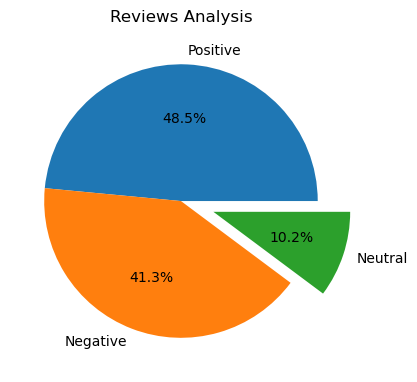

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("abhi.csv")

## Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 326.8 kB/s eta 0:00:01
   ----------------------- --------------- 92.2/151.4 kB 655.4 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 751.0 kB/s eta 0:00:00


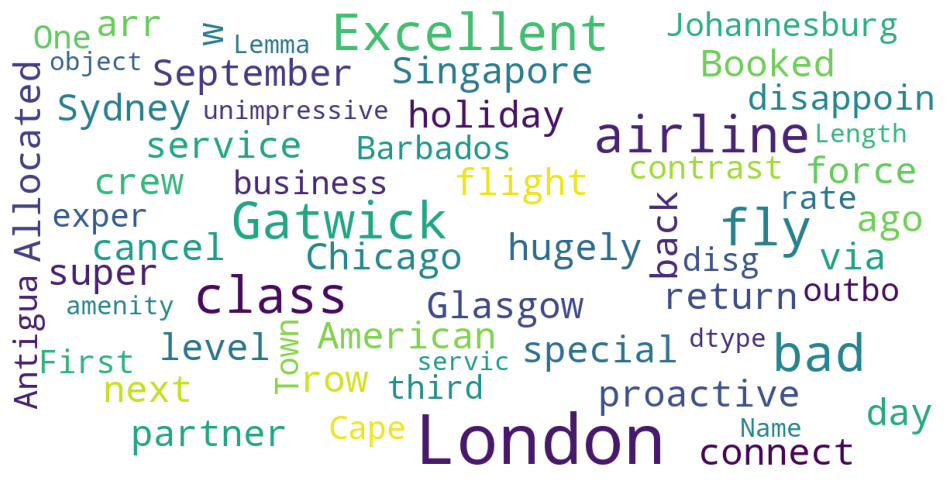

In [18]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)